# CM5 - Exceptions, gestion des erreurs

Que se passe-t-il quand python rencontre une erreur (ne peut pas terminer correctement une instruction) ?

Exemples :

In [1]:
liste = [1,2,3]
print(liste{1},2+

SyntaxError: invalid syntax (3379975808.py, line 2)

Mais ceci peut se produire même quand l'instruction est syntaxiquement correcte.

In [2]:
liste = [1,2,3]
print(liste[3])

IndexError: list index out of range

In [3]:
a = 3
b = 0
print (a/b)

ZeroDivisionError: division by zero

In [4]:
nombre = "123g"
n = int(nombre)
print(n)

ValueError: invalid literal for int() with base 10: '123g'

In [5]:
def a(b):
    return b+c(b)
def c(b):
    return a(b)
nb = a(3)

RecursionError: maximum recursion depth exceeded

In [6]:
f = open("fichier-qui-n-existe-pas.txt")
f.close()

FileNotFoundError: [Errno 2] No such file or directory: 'fichier-qui-n-existe-pas.txt'

In [7]:
print(4 + "abc")

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [8]:
a = {
    'a': 1,
    "b": 2
}
print(a['X'])


KeyError: 'X'

**Problématique** : un programme bien écrit devrait prévoir toutes les sources d'erreurs possibles et les traiter (au lieu de s'arrêter au milieu de l'exécution avec une erreur).

Exemple de vérification manuelle de la validité des données :

Un programme qui multiplie un nombre par 2. Le nombre est saisi par l'utilisateur.

In [11]:
import re

nombre = "2" # ok
nombre = 'a' # erreur

if not re.match("\\d+", nombre) :
    print("Erreur : vous n'avez pas saisi un nombre entier.")
    
else :
    nb = int(nombre)  # ceci est possible parce qu'ici nous sommes surs que 
                    # nombre contient uniquement des chiffres
    print("Le nombre multiplié par 2 est : " + str(nb*2))

Erreur : vous n'avez pas saisi un nombre entier.


## try ... except ...

Le même code ci-dessus peut se présenter comme suit :

In [13]:
nombre = "2" # ok
nombre = 'a' # erreur

try :
    nb = int(nombre)  
    print("Le nombre multiplié par 2 est : " + str(nb*2))
    # dans la partie "try" nous mettons le code "sensible", qui
    # pourrait potentiellement produire une erreur
except :
    # le bloc "except" sera executé si le bloc "try" n'a pas reussi
    print("Erreur : vous n'avez pas saisi un nombre entier.")
    
print("Fin du programme")

Erreur : vous n'avez pas saisi un nombre entier.
Fin du programme


Un bloc "try...except" permet de saisir une séquence d'instructions qui pourraient potentiellement produire une erreur. Si l'erreur se produit dans la partie "try", l'exécution passe directement à la partie "except". 

Avantages :
- le programme de s'arrête pas, il pourra terminer correctement.
- toutes les erreurs possibles sont gérées automatiquement. Nous n'avons pas besoin de prévoir toutes les possibilités et les gérer avec des "if".

Forme complète :

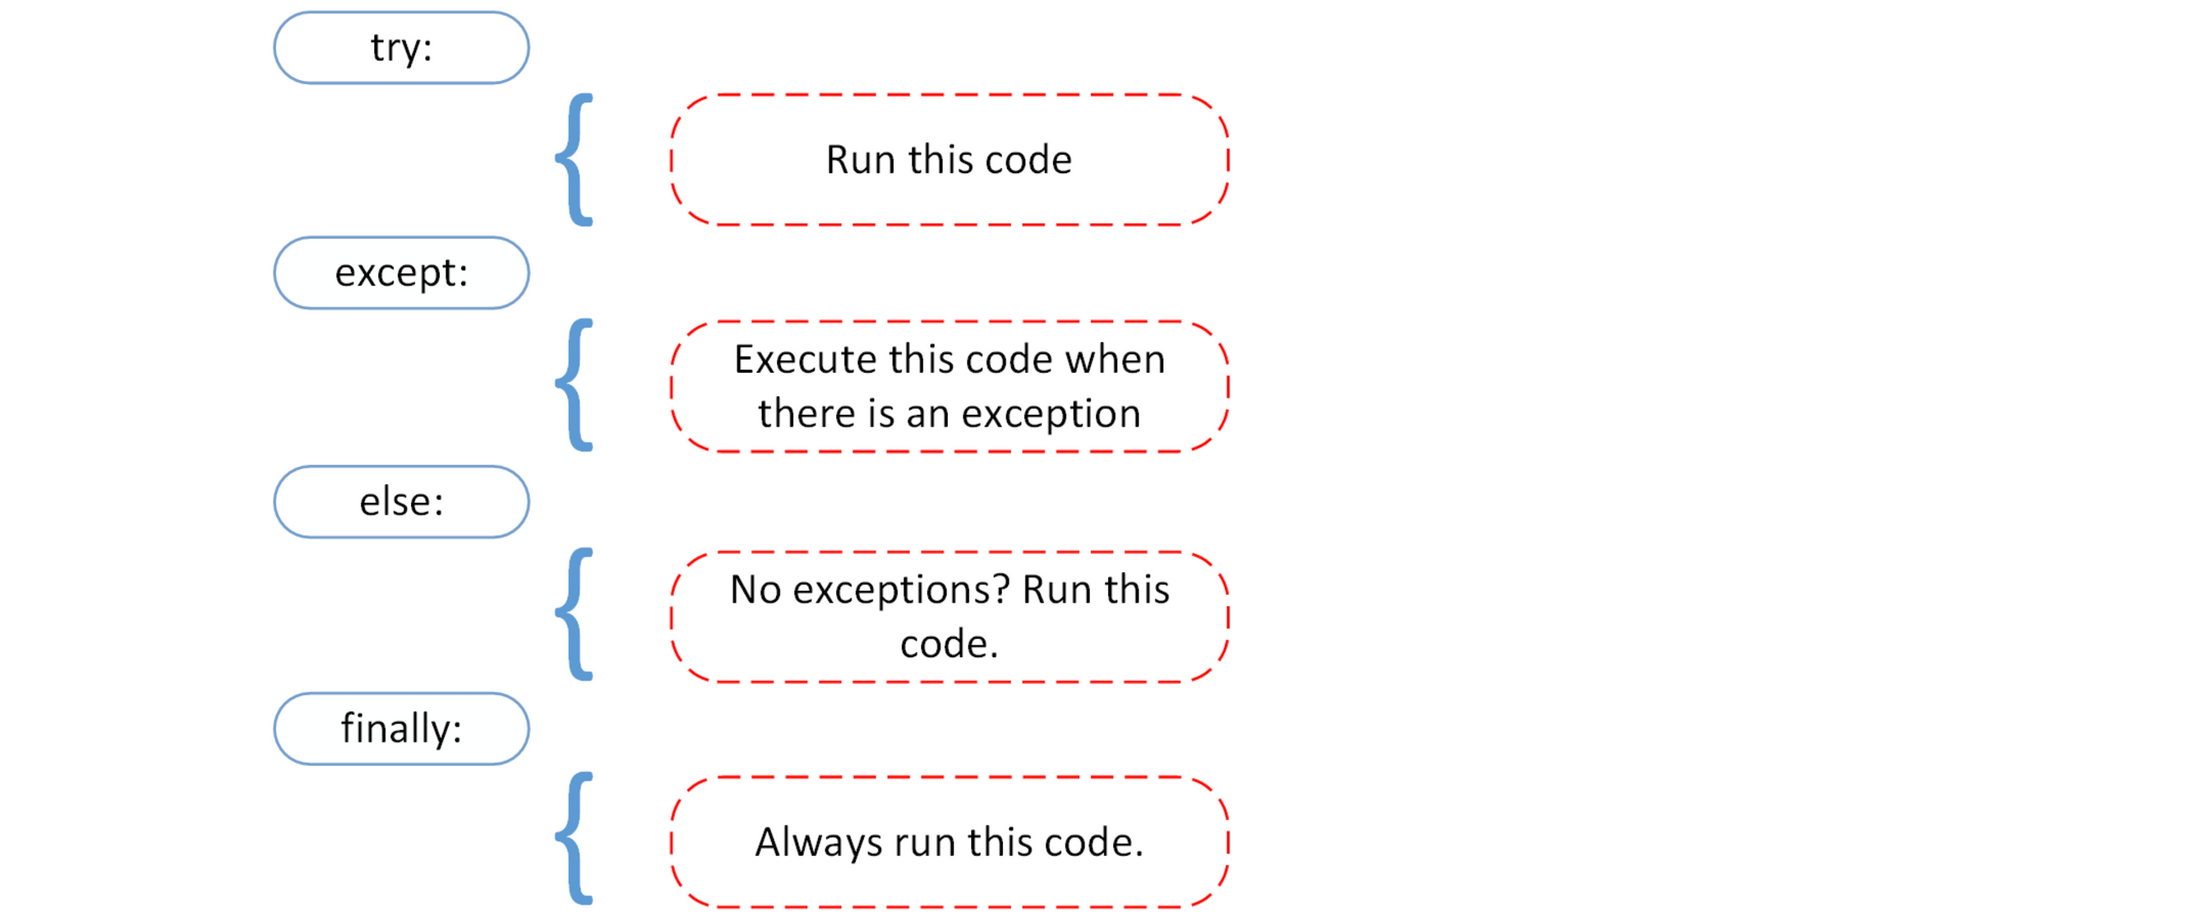

In [16]:
nombre = "2" # ok
nombre = 'a' # erreur

try :
    nb = int(nombre)  
except :
    print("Erreur : vous n'avez pas saisi un nombre entier.")
else :
    print("Le nombre multiplié par 2 est : " + str(nb*2))
finally :
    print("Fin du programme")

Erreur : vous n'avez pas saisi un nombre entier.
Fin du programme


## Gérer plusieurs erreurs à la fois

In [17]:
nombre = "2" # ok
# nombre = 'a' # erreur

try :
    nb = int(nombre) 
    f = open("fichier.txt")

except ValueError:
    print("Erreur : vous n'avez pas saisi un nombre entier.")

except FileNotFoundError:
    print("Erreur : le fichier n'existe pas.")
    
else :
    print("Le nombre multiplié par 2 est : " + str(nb*2))
    texte = f.read()
    print(texte)
    f.close()
finally :
    print("Fin du programme")

Erreur : le fichier n'existe pas.
Fin du programme


Possibilité d'accéder aux informations de l'erreur :

In [18]:
# nombre = "2" # ok
nombre = 'a' # erreur

try :
    nb = int(nombre) 
    f = open("fichier.txt")

except ValueError as vError:
    print("Erreur : vous n'avez pas saisi un nombre entier.\n" + str(vError))

except FileNotFoundError as fError:
    print("Erreur : le fichier n'existe pas." + str(fError))

else :
    print("Le nombre multiplié par 2 est : " + str(nb*2))
    texte = f.read()
    print(texte)
    f.close()
    
finally :
    print("Fin du programme")

Erreur : vous n'avez pas saisi un nombre entier.
invalid literal for int() with base 10: 'a'
Fin du programme


_ValueError_ et _FileNotFoundError_ sont des classes qui définissent ces types d'erreurs. Elles sont des sous-classes de _Exception_, qui contient comme sous-classes tous les types d'erreurs.

Les classes qui définissent les objets "Exception" sont décrites ici : https://docs.python.org/fr/3/library/exceptions.html#bltin-exceptions

Une Exception (erreur) est un objet particulier qui est créé si le programme rencontre un problème. Dans ce cas-là, on dit qu'**une exception est "levée"** (en anglais "to raise an exception").

## Lever une exception

Quand une erreur doit être traitée à l'intérieur d'une fonction ou d'une méthode, il est possible : 
- de la traiter tout de suite (1), 
- ou bien de renvoyer l'erreur vers le programme/fonction/méthode qui a fait appel à cette fonction (2).

Exemple : un programme qui multiplie un nombre par 2, à partir de la saisi de l'utilisateur.
La fonction prendra comme argument une chaîne de caractères, tentera de la convertir en nombre et le multiplier par 2.

In [19]:
def mult_deux(s) :
    try:
        nb = int(s)
        return nb*2
    except:
        print("Erreur : vous n'avez pas saisi un nombre entier.")
    else:
        return False

nombre = "2" # ok
# nombre = 'a' # erreur

nb2 = mult_deux(nombre)
print("Le nombre multiplié par 2 est : " + str(nb2))

Le nombre multiplié par 2 est : 4


### Cas (1) - l'erreur est traitée dans la fonction


Quand une erreur se produit, la fonction doit retourner un résultat (dans notre cas False) et ce résultat devra être pris en compte dans tous les autres traitements du programme.

Dans l'exemple ci-dessus pour éviter l'affichage de la dernière ligne en cas d'erreur :

In [2]:
def mult_deux(s) :
    try:
        nb = int(s)
        return nb*2
    except:
        print("Erreur : vous n'avez pas saisi un nombre entier.")
    else:
        return False

# nombre = "2" # ok
nombre = 'a' # erreur

nb2 = mult_deux(nombre)
# remarquez que if nb2 est equivalent à if nb2 == True
if nb2 or nb2==0 :
    print("Le nombre multiplié par 2 est : " + str(nb2))

Erreur : vous n'avez pas saisi un nombre entier.


### Cas (2) - l'erreur est renvoyée vers le programme/fonction/méthode qui a fait appel à cette fonction

L'instruction "raise" permet de lever une _Exception_ (en créant un nouvel objet ou simplement en utilisant l'exception déjà produite) et de passer le contrôle au programme/fonction/méthode qui l'a appelée.

In [3]:
def mult_deux(s) :
    try:
        nb = int(s)
        return nb*2
    except:
        raise Exception("Vous n'avez pas saisi un nombre entier.")

nombre = "2" # ok
nombre = 'a' # erreur

mult_deux(nombre)
# try:
#     nb2 = mult_deux(nombre)
# except Exception as e:
#     print(e)


Exception: Vous n'avez pas saisi un nombre entier.

Variante qui ne crée pas de nouvel objet _Exception_ :

In [4]:
def mult_deux(s) :
    try:
        nb = int(s)
        return nb*2
    except Exception as e:
        raise e

nombre = "2" # ok
nombre = 'a' # erreur
try:
    nb2 = mult_deux(nombre)
except Exception as e:
    print(e)

invalid literal for int() with base 10: 'a'


## Exemple avec des objets

In [ ]:
class Mot :
    def __init__(self, forme):
        # verification si forme est bien une chaine de caracteres
        if forme != str(forme) : 
            raise Exception("Valeur pour forme invalide : " + str(forme))
        self.forme = forme 

In [ ]:
class PronomPersonnel(Mot) :
               
    # constructeur
    def __init__(self, forme, nombre, personne, genre="m"):
        super().__init__(forme)
        
        # verification de la validite des donnees :
        if nombre not in ["sg", "pl"] or personne not in [1,2,3] or genre not in ["m", "f", "n"]:
            raise Exception("Appel à PronomPersonnel avec arguments invalides.")
        
        self.__nombre = nombre
        self.__personne = personne
        self.__genre = genre
    
    def getNombre(self):
        return self.__nombre
    
    def getPersonne(self):
        return self.__personne
    
    def getGenre(self):
        return self.__genre
                     
    def __str__(self):
        return self.forme + " (" + self.__nombre + "," + str(self.__personne) + self.__genre + ")"

In [ ]:
# pas de modification ici
class PronomPersonnelSujet(PronomPersonnel) :
    # liste de pronoms
    __liste_pronoms = ["je", "tu", ["il", "elle", "on"], "nous", "vous", ["ils", "elles"] ]
    
    # une methode pour retrouver la forme d'un pronom a partir de la liste de pronoms
    # cette methode sera utilisee dans le constructeur
    @staticmethod
    def trouverForme(nombre, personne, genre="m") :
        forme = ""
        if nombre == "sg" : 
            forme = PronomPersonnelSujet.__liste_pronoms[personne-1]
        else : 
            forme = PronomPersonnelSujet.__liste_pronoms[personne+2]
        if personne == 3 :
            if genre == "m": 
                forme = forme[0]
            elif genre == "n" and nombre == "sg" : 
                forme = forme[2]
            else :
                forme = forme[1]
        return forme
    
    # redefinition du constructeur
    def __init__(self, nombre, personne, genre="m"):
        forme = PronomPersonnelSujet.trouverForme(nombre, personne, genre)
        super().__init__(forme, nombre, personne, genre)

In [ ]:
a = PronomPersonnelSujet("sg", 2)
print(a)

In [ ]:
b = PronomPersonnelSujet("sg", 4)
print(b)

In [ ]:
m = Mot(False)

### Exercices

1. Créez une classe _Nom_, sous-classe de _Mot_.
    - Attributs : forme, genre, nombre, hyponymes (liste de noms), hyperonymes (liste de noms)
    - Méthodes : constructeur (qui lève des exceptions si besoin), ajouterHyponyme(m), ajouterHyperonyme(m), verifierRelation(m) - renvoie "hyponyme", "hyperonyme" ou "aucune".

N'oubliez pas d'ajouter les commentaires et la documentation

2. Créez une classe _Adjectif_, sous-classe de _Mot_.
    - Attributs : forme, genre, nombre
    - Méthodes : constructeur (qui lève des exceptions si besoin), accorderAvec(nom):str

N'oubliez pas d'ajouter les commentaires et la documentation